In [1]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize':(10,6)})

c:\Users\Vince\anaconda3\envs\wise_group_galaxy_pred\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
losses = torch.load('models/model_30-01-2024-14-35-40_losses.pt')
print(losses)

[1073790144.2452106, 527241069.8544061, 582056143.9386973, 872540622.9578544, 816230039.0498084, 575826045.5478927, 986156632.2758621, 636068789.4559387, 546317531.7088122, 589517829.8850574, 784705528.1532567, 803974995.3716475, 1036769538.9425287, 1052735260.4444444, 655103772.4444444, 813266496.7356322, 806697940.8429118, 682373630.0383142, 946281585.7777778, 580084076.8735632, 591753192.4597701, 594829739.6475096, 769319147.4022988, 570440782.467433, 610386716.4444444, 631393786.1149426, 1201467909.8850574, 1094889534.7739463, 563189132.2605364, 549218884.6590039, 646240538.4827586, 517203842.45210725, 520860993.71647507, 599991641.2567049, 901949526.3141762, 634808241.532567, 532866769.9003831, 666935539.2490422, 567732396.6283525, 647148100.6590039, 757535614.5287356, 508971669.0881226, 821063224.8888888, 815886948.045977, 506965158.743295, 1014995124.4750957, 654564638.4061303, 643232520.8275862, 572377209.624521, 630682800.5517242, 749662898.51341, 539048424.4597701, 645875421.

Text(0, 0.5, 'Loss (Average MSE)')

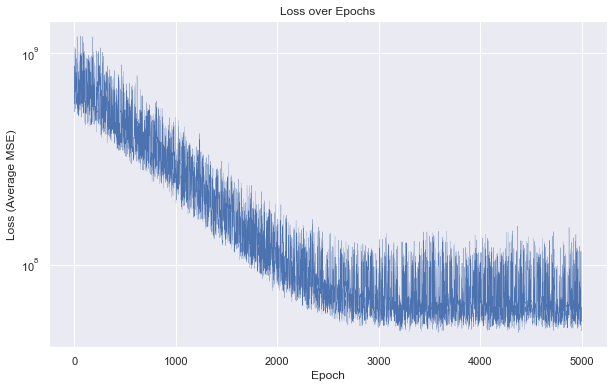

In [3]:
ax = sns.lineplot(losses, linewidth=.25)
ax.set_title('Loss over Epochs')
ax.set_xlabel('Epoch')
ax.set_yscale('log')
ax.set_ylabel('Loss (Average MSE)')


# Model Performance Visualizations

In [4]:
# Setup Model
from model import GCN

model = GCN()
model.state_dict = torch.load('models/model_30-01-2024-14-35-40.pt')
model.eval()


GCN(
  (relu): ReLU()
  (conv1): GCNConv(2, 32)
  (conv2): GCNConv(32, 128)
  (conv3): GCNConv(128, 128)
  (conv4): GCNConv(128, 128)
  (conv5): GCNConv(128, 128)
  (lin): Linear(in_features=128, out_features=1, bias=True)
  (leaky): LeakyReLU(negative_slope=0.01)
)

In [5]:
data = torch.load("datasets/SG256_From_Enzo_Cleaned_SM_Only_Test.pt")

y_truth = np.array([])
y_pred = np.array([])
for graph in data:
    # Feature Selection (should do this better...)
    graph.x = torch.tensor([[data[0], data[1]] for data in graph.x])
    
    for item in graph.y:
        y_truth = np.append(y_truth, item)

    out = model(graph)
    for item in out.tolist():
        y_pred = np.append(y_pred, item[0])

print(len(y_pred), len(y_truth))
print(y_pred, y_truth)


10985 10985
[4918.24804688 3741.99365234 2687.45336914 ... 6474.06787109 8980.98925781
  649.58856201] [3350.70678711  506.71243286  506.71243286 ...  589.0291748   589.0291748
  664.12841797]


10985 10985


Text(0, 0.5, 'Predicted Stellar Mass (MSun)')

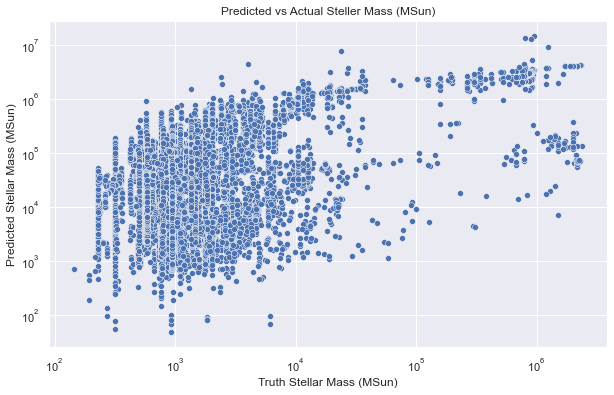

In [6]:
ax = sns.scatterplot(x=y_truth, y=y_pred)
print(len(y_truth), len(y_pred))
ax.set_title('Predicted vs Actual Steller Mass (MSun)')
ax.set_xscale('log')
ax.set_xlabel('Truth Stellar Mass (MSun)')
ax.set_yscale('log')
ax.set_ylabel('Predicted Stellar Mass (MSun)')

Text(0.5, 0, 'Truth Stellar Mass (MSun)')

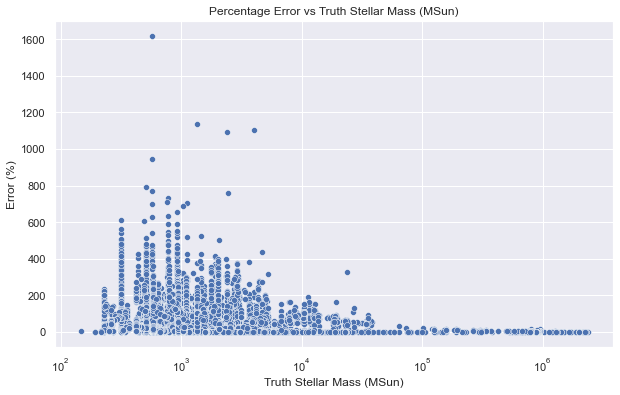

In [7]:
error = (y_pred - y_truth) / y_truth
ax = sns.scatterplot(x=y_truth, y=error)
ax.set_xscale('log')
ax.set_title('Percentage Error vs Truth Stellar Mass (MSun)')
ax.set_ylabel('Error (%)')
ax.set_xlabel('Truth Stellar Mass (MSun)')